In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-colorblind')



In [2]:
df = pd.read_csv('C://Users/Nikanshi/Documents/MSBA/Fall19/ML/Assignment2/bank-additional-full.csv', sep = ';')
data =  df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
X_label = LabelEncoder()

df['job'] = X_label.fit_transform(df['job'])
df['marital'] = X_label.fit_transform(df['marital'])
df['education'] = X_label.fit_transform(df['education'])
df['default'] = X_label.fit_transform(df['default'])
df['housing'] = X_label.fit_transform(df['housing'])
df['loan'] = X_label.fit_transform(df['loan'])
df['contact'] = X_label.fit_transform(df['contact'])
df['month'] = X_label.fit_transform(df['month'])
df['day_of_week'] = X_label.fit_transform(df['day_of_week'])
df['poutcome'] = X_label.fit_transform(df['poutcome'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:

y = (pd.get_dummies(data['y'], columns = ['y'], prefix = 'y', drop_first = True)).values
type(y)
y[:5]
y = np.ravel(y)
y[:4]

array([0, 0, 0, 0], dtype=uint8)

In [5]:
df.drop(columns=['y'],inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [6]:
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [7]:
X_train,X_valid,y_train,y_valid = train_test_split(df,y,test_size=0.3,random_state=42)

In [8]:
print('Shape of Training set : ' , [X_train.shape,y_train.shape])
print('Shape of Validation set : ' , [X_valid.shape,y_valid.shape])

Shape of Training set :  [(28831, 20), (28831,)]
Shape of Validation set :  [(12357, 20), (12357,)]


# PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 5).fit(X_train)
# PCA(copy=True, n_components=2, whiten=False)

x_pca = pca.transform(X_train)
print(X_train.shape, x_pca.shape)

(28831, 20) (28831, 5)


In [11]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))

[6.32443566e-01 3.24864195e-01 4.11536796e-02 1.02046495e-03
 1.93477102e-04]
0.9996753830092847


Text(0, 0.5, 'Second Principal Component')

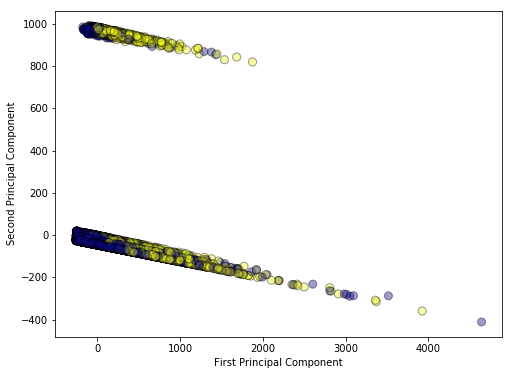

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_train, cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

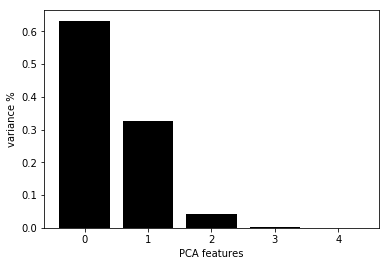

In [13]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

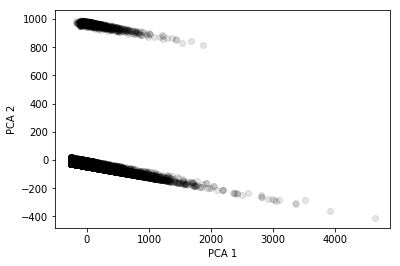

In [14]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [15]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


# Neural Network after PCA

In [16]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

#import pandas as pd
#from keras.models import Sequential
#from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [17]:
# Initialize the constructor
model_3 = Sequential()

# Add an input layer 
model_3.add(Dense(32, activation='relu', input_shape=(5,)))

# Add one hidden layer 
model_3.add(Dense(16, activation='relu'))

# Add second hidden layer 
model_3.add(Dense(16, activation='relu'))

# Add an output layer 
model_3.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model_3.fit(PCA_components, y_train,epochs=10, batch_size=1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
28831/28831 [==============================] - 33s 1ms/step - loss: 0.3720 - acc: 0.8893
Epoch 2/10
28831/28831 [==============================] - 31s 1ms/step - loss: 0.2529 - acc: 0.8997
Epoch 3/10
28831/28831 [==============================] - 36s 1ms/step - loss: 0.3894 - acc: 0.9020
Epoch 4/10
28831/28831 [==============================] - 39s 1ms/step - loss: 0.4643 - acc: 0.8981
Epoch 5/10
28831/28831 [==============================] - 40s 1ms/step - loss: 0.4695 - acc: 0.8991
Epoch 6/10
28831/28831 [==============================] - 43s 1ms/step - loss: 0.5584 - acc: 0.8927
Epoch 7/10
28831/28831 [==============================] - 39s 1ms/step - loss: 0.5597 - acc: 0.8921
Epoch 8/10
28831/28831 [==============================] - 40s 1ms/step - loss: 0.4755 - acc: 0.8976
Epoch 9/10
28831/28831 [==============================] - 43s 1ms/step - loss: 0.3849 - acc: 0.9038
Epoch 10/10
28831/28831 [===========================

In [19]:
y_pred_3 = model_3.predict(PCA_components)

In [20]:
scores_3 = model_3.evaluate(np.array(PCA_components), np.array(y_train))

28831/28831 [==============================] - 0s 15us/step


In [21]:
print("\n%s: %.2f%%" % (model_3.metrics_names[1], scores_3[1]*100))


acc: 90.41%
